# Solving the contact flow for the Harmonic Oscillator that generates the Gibbs distribution through the Taylor series integrator

In [1]:
using PyPlot #Para las gráficas

INFO: Loading help data...


In [2]:
include("../contactTaylor.jl");

In [3]:
condinic = [0.0, 1.0,0.001] # q, p, S ;

In [4]:
nsteps = 20000 #Número de pasos ;
ndescarte = 100 #Descarto los primeros pasos que pueden ser inútiles para la estadística;

In [5]:
vec = contactIntegration(campoContacto, nsteps,condinic);

**vec**  es una tupla de arreglos con entradas `(tiempo, q,p, S)` .
Cada elemento de la tupla es un arreglo de longitud *nsteps*, conteniendo los resultados de la integración de l campo a cada paso de tiempo.

In [6]:
t = vec[1][ndescarte:end]; q = vec[2][ndescarte:end]; p = vec[3][ndescarte:end]; S = vec[4][ndescarte:end];

## Espacio fase 

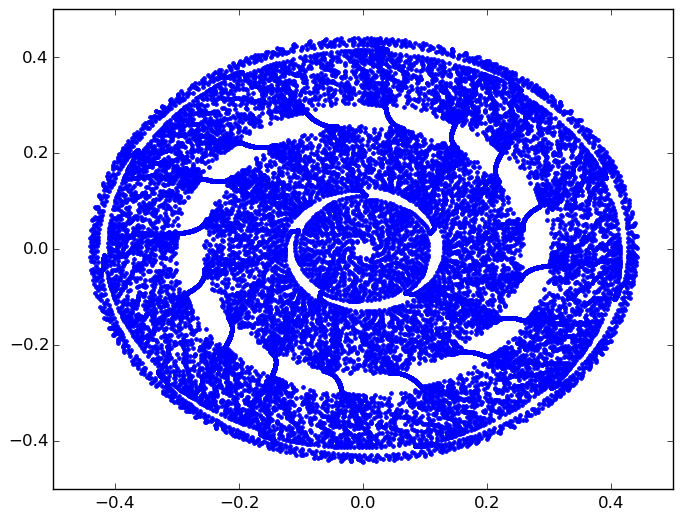

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f27535c7210>

In [7]:
plot(q,p,".")

## p(t) y q(t)

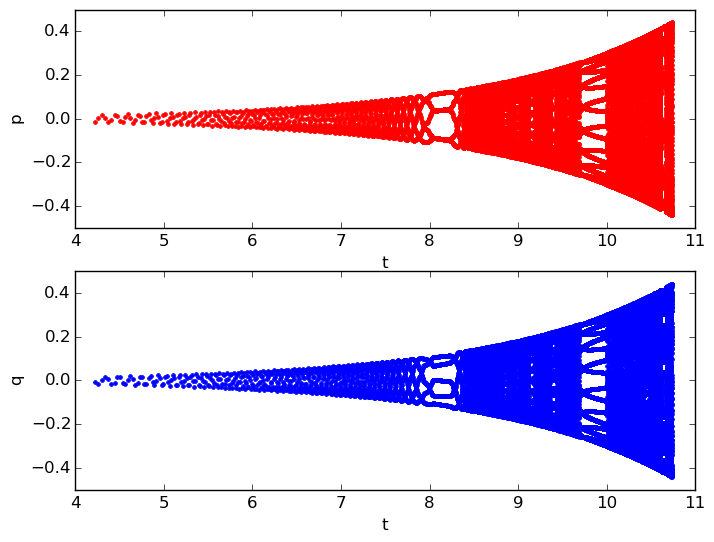

PyObject <matplotlib.text.Text object at 0x7f2750351d10>

In [8]:
plt[:figure](1)
plt[:subplot](211)
plt[:plot](t, p, "r.")
plt[:xlabel]("t")
plt[:ylabel]("p")

plt[:subplot](212)
plt[:plot](t, q, "b.")
plt[:xlabel]("t")
plt[:ylabel]("q")

## Histogramas 

In [9]:
nbins = 50;

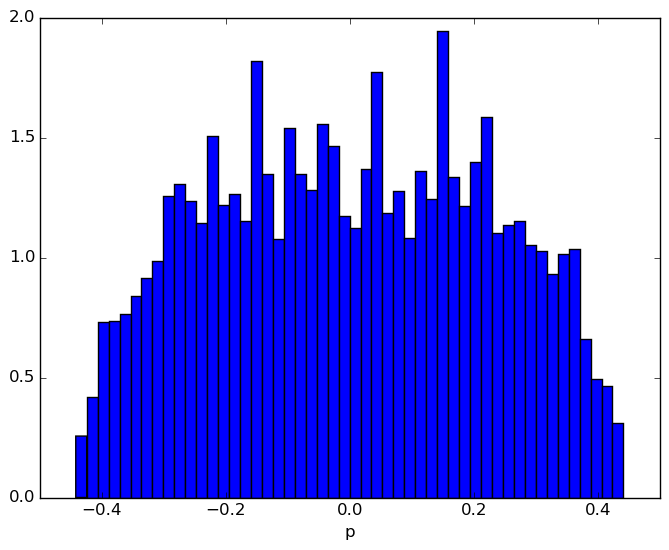

PyObject <matplotlib.text.Text object at 0x7f272e5c7750>

In [10]:
plt[:hist](p, nbins, normed = 1)
plt[:xlabel]("p")

In [11]:
E = (p.^2 + q .^2)/2.;

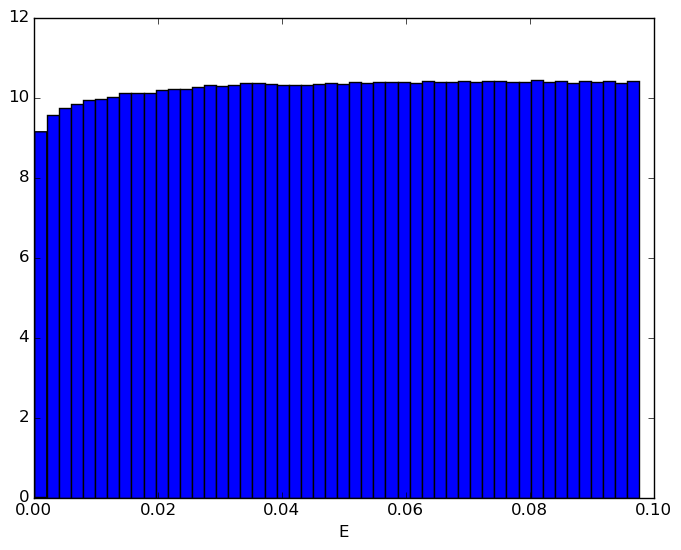

In [12]:
plt[:hist](E, 50, normed =1);
plt[:xlabel]("E");

## Información adicional

In [13]:
using StatsBase

In [14]:
ECDF = ecdf(E) #Empirical Cumulative Distribution Function

ef (generic function with 2 methods)

In [15]:
intervalo = [0.:0.001:1.0;];

In [16]:
CCDF = 1. - ECDF(intervalo)  #Complementary Cumulatice Distribution function;

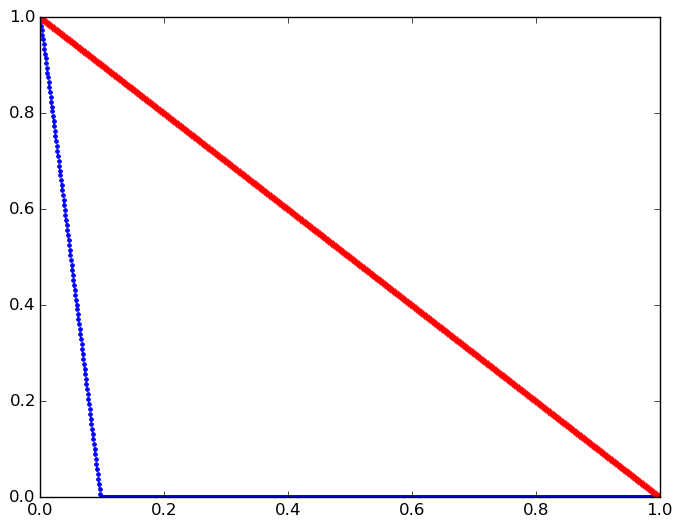

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f272e0d41d0>

In [17]:
plot(intervalo, CCDF, ".--")
plot(intervalo, 1. - intervalo, "r+")

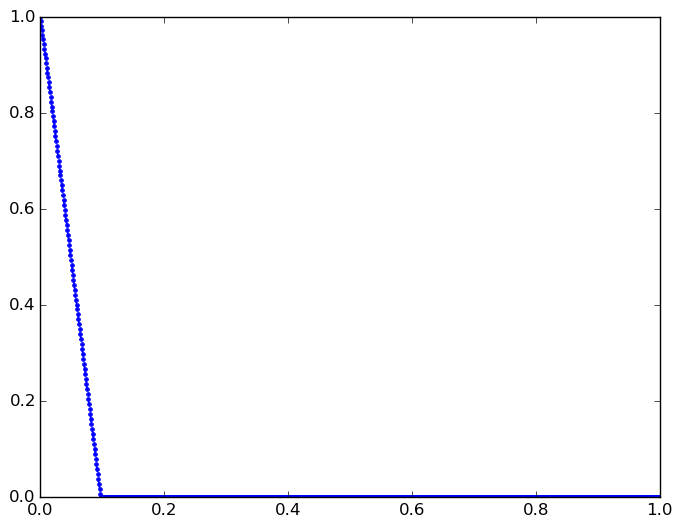

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f272e070a90>

In [18]:
plot(intervalo, CCDF, ".--")

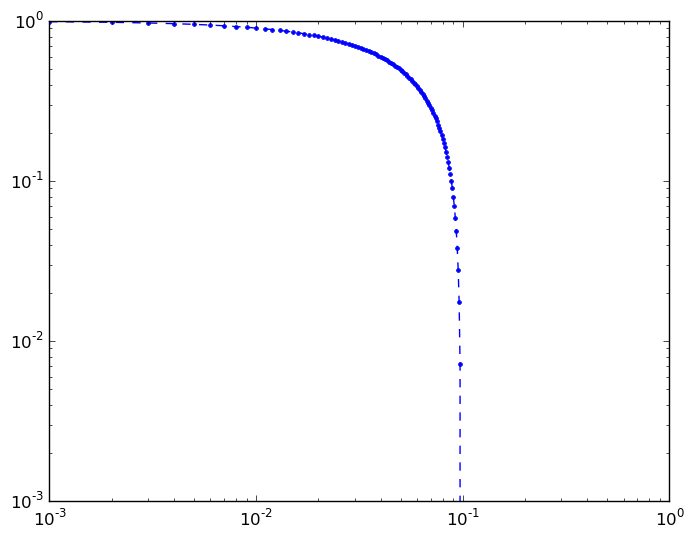

In [19]:
plot(intervalo, CCDF, ".--")
ax = gca()
ax[:set_yscale]("log")
ax[:set_xscale]("log")

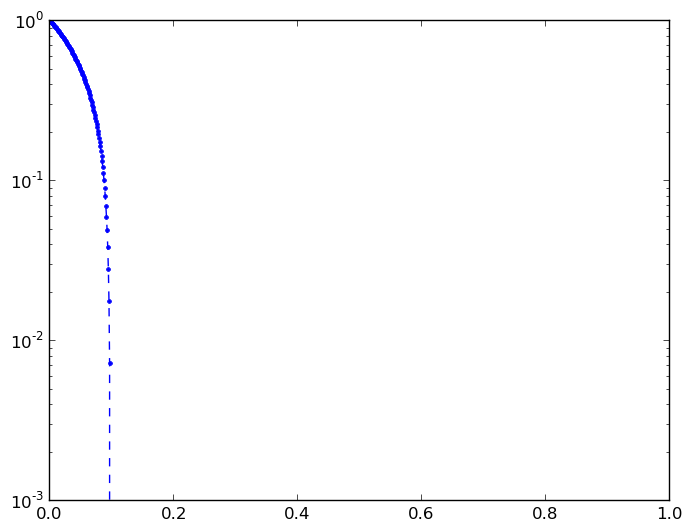

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f272dfe8790>

In [20]:
ax = gca()
ax[:set_yscale]("log")
plot(intervalo, CCDF, ".--")